In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from census import Census
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as sps
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Preprocessing

In [7]:
df = pd.read_csv('../training_data/final_data.csv')
df

,SHRP_ID,STATE_CODE,VISIT_DATE,IRI_LEFT_WHEEL_PATH,IRI_RIGHT_WHEEL_PATH,MAX_ANN_HUM_AVG,MIN_ANN_HUM_AVG,MEAN_ANN_TEMP_AVG,FREEZE_THAW_YR,TOTAL_ANN_PRECIP,TOTAL_SNOWFALL_YR,AADT_ALL_VEHIC,MEPDG_TRANS_CRACK_LENGTH_AC
0,0001,48,1990-03-06,0.6904,0.6570,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818
1,0001,48,1992-03-17,0.6894,0.7312,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818
2,0001,48,1993-07-13,0.7472,0.6938,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818
3,0001,48,1995-05-03,0.7092,0.7838,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818
4,0001,48,1997-08-06,0.7600,0.7508,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,Q350,48,1995-05-01,1.2042,1.1674,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,-1.000000
29766,Q350,48,2001-04-18,1.1592,1.0578,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,-1.000000
29767,Q353,48,1990-09-17,1.1030,0.7784,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,2.183333
29768,Q353,48,1995-05-01,1.2294,1.0444,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,2.183333


<AxesSubplot:>

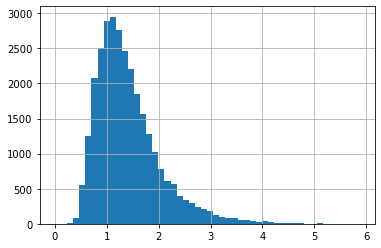

In [8]:
df = pd.read_csv('../training_data/final_data.csv')
df['IRI_LEFT_WHEEL_PATH'].value_counts()

df['Mean_IRI'] = 0.5*(df['IRI_LEFT_WHEEL_PATH']+df['IRI_RIGHT_WHEEL_PATH'])

df['Mean_IRI'].hist(bins=50)

In [9]:
# df.loc[df['Mean_IRI'] <= 1.50, 'IRI_condition'] = 2#'good'
# df.loc[(df['Mean_IRI'] > 1.50) & (df['Mean_IRI'] <= 2.68), 'IRI_condition'] = 1#'acceptable'
# df.loc[df['Mean_IRI'] > 2.68, 'IRI_condition'] = 0#'poor'
# df['IRI_condition'].hist()

In [10]:
df

,SHRP_ID,STATE_CODE,VISIT_DATE,IRI_LEFT_WHEEL_PATH,IRI_RIGHT_WHEEL_PATH,MAX_ANN_HUM_AVG,MIN_ANN_HUM_AVG,MEAN_ANN_TEMP_AVG,FREEZE_THAW_YR,TOTAL_ANN_PRECIP,TOTAL_SNOWFALL_YR,AADT_ALL_VEHIC,MEPDG_TRANS_CRACK_LENGTH_AC,Mean_IRI
0,0001,48,1990-03-06,0.6904,0.6570,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.6737
1,0001,48,1992-03-17,0.6894,0.7312,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7103
2,0001,48,1993-07-13,0.7472,0.6938,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7205
3,0001,48,1995-05-03,0.7092,0.7838,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7465
4,0001,48,1997-08-06,0.7600,0.7508,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,Q350,48,1995-05-01,1.2042,1.1674,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,-1.000000,1.1858
29766,Q350,48,2001-04-18,1.1592,1.0578,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,-1.000000,1.1085
29767,Q353,48,1990-09-17,1.1030,0.7784,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,2.183333,0.9407
29768,Q353,48,1995-05-01,1.2294,1.0444,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,2.183333,1.1369


In [11]:
df['VISIT_DATE'] = pd.to_datetime(df['VISIT_DATE'])
df['year'] = df['VISIT_DATE'].dt.strftime('%Y')
df['construction_time'] = 2022 - df['year'].astype(int)
# df = df[['STATE_CODE','AADT_ALL_VEHIC','MEPDG_TRANS_CRACK_LENGTH_AC','construction_time','Mean_IRI']]
df

,SHRP_ID,STATE_CODE,VISIT_DATE,IRI_LEFT_WHEEL_PATH,IRI_RIGHT_WHEEL_PATH,MAX_ANN_HUM_AVG,MIN_ANN_HUM_AVG,MEAN_ANN_TEMP_AVG,FREEZE_THAW_YR,TOTAL_ANN_PRECIP,TOTAL_SNOWFALL_YR,AADT_ALL_VEHIC,MEPDG_TRANS_CRACK_LENGTH_AC,Mean_IRI,year,construction_time
0,0001,48,1990-03-06,0.6904,0.6570,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.6737,1990,32
1,0001,48,1992-03-17,0.6894,0.7312,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7103,1992,30
2,0001,48,1993-07-13,0.7472,0.6938,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7205,1993,29
3,0001,48,1995-05-03,0.7092,0.7838,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7465,1995,27
4,0001,48,1997-08-06,0.7600,0.7508,89.222222,44.814815,20.363636,15.303030,859.939394,12.424242,-1.000000,12.881818,0.7554,1997,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,Q350,48,1995-05-01,1.2042,1.1674,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,-1.000000,1.1858,1995,27
29766,Q350,48,2001-04-18,1.1592,1.0578,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,-1.000000,1.1085,2001,21
29767,Q353,48,1990-09-17,1.1030,0.7784,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,2.183333,0.9407,1990,32
29768,Q353,48,1995-05-01,1.2294,1.0444,88.333333,43.666667,18.636364,36.295455,743.522727,15.431818,1158.809524,2.183333,1.1369,1995,27


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# AADT = df['AADT_ALL_VEHIC'].values.reshape(-1, 1)
# AADT = scaler.fit_transform(AADT)
# df['AADT_ALL_VEHIC'] = AADT

# df

In [12]:
df.to_csv('preprocessed_data.csv',index='False')